In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit as fit
from ast import literal_eval

from importlib import reload
from tblib import lattice
from tblib import hamiltonian

reload(lattice)
reload(hamiltonian)

<module 'tblib.hamiltonian' from 'c:\\Users\\atsch\\Desktop\\MasterVorlesungen\\Masterthesis\\Code\\tblib\\hamiltonian.py'>

In [62]:
#sfwtab = pd.read_csv(r'C:\Users\atsch\Desktop\MasterVorlesungen\Masterthesis\Code\SFW_U_zero_to_five', index_col=0)



sfwtab_6 = pd.read_csv(r'datafiles\sfw_scn_15U_0-10_mu_eq_-0c5', index_col=0)
sfwtab_7 = pd.read_csv(r'datafiles\sfw_scn_15U_0-10_mu_eq_0', index_col=0)
sfwtab_5 = pd.read_csv(r'datafiles\sfw_scn_15U_0-10_mu_eq_-3-1', index_col=0)


In [71]:
sfwtab = pd.concat((sfwtab_5,sfwtab_6, sfwtab_7), ignore_index=True)
#sfwtab=sfwtab_7



In [72]:
sfwtab

,U,mu,nu,sq_det_SFW,SFWxx,SFWxy,delta,ns,deltaError,nError,SFWxx_new,SFWxy_new
0,0.000010,-3.0,(0.00028737184710839403+2.689174842611024e-43j),(1.4703837737708833e-18-1.0765346336766606e-35j),[-1.47038378e-18+1.07653464e-35j -9.40305660e-...,[-9.40305663e-28-8.40198730e-45j -1.47038377e-...,[(0.00019158858686683765-9.944656593066207e-41...,[(9.57906157082954e-05+2.6940697141007915e-43j...,0.000164,8.182649e-05,(-1.4703837760495086e-18+1.0765346448195431e-35j),(-9.403056600154204e-28-8.40198940782259e-45j)
1,0.714295,-3.0,(4.707341846962518e-05+1.1432528159932538e-26j),(1.5500149026432058e-08-1.172254851553541e-25j),[-1.55001490e-08+1.17225485e-25j -3.01123155e-...,[-2.97736883e-24-1.07468483e-39j -1.55001490e-...,[(0.0003467583235640678+2.802121362110079e-27j...,[(1.9330644996969313e-05+1.1269011888334603e-2...,0.000158,1.414240e-05,(-1.550014902643248e-08+1.1722548515534075e-25j),(-3.011231551551152e-24-1.1418339846185712e-39j)
2,1.428580,-3.0,(7.0780666191044775e-06-3.759961370145819e-28j),(1.1827952845920457e-07-9.068240661837759e-25j),[-1.18279528e-07+9.06824066e-25j -4.70817847e-...,[-4.72761720e-23+6.06573587e-39j -1.18279528e-...,[(0.000510922313125362-5.269980179278338e-29j)...,[(3.6795362898738817e-06-3.765721684489313e-28...,0.000134,2.066976e-06,(-1.1827952845920162e-07+9.068240661837852e-25j),(-4.7081784719901964e-23+6.296046555845658e-39j)
3,2.142865,-3.0,(9.343363243402498e-06-4.200047076101412e-28j),(1.087651757851358e-06-8.357589047223222e-24j),[-1.08765176e-06+8.35758905e-24j -6.10555601e-...,[-6.12681453e-22-3.25206711e-38j -1.08765176e-...,[(0.0010431753172782544+6.845962462178218e-30j...,[(5.157096950050048e-06-4.200047076102113e-28j...,0.000138,1.420570e-06,(-1.0876517578513424e-06+8.357589047223249e-24j),(-6.105556008735003e-22-3.3249435989648275e-38j)
4,2.857150,-3.0,(0.0001717784501848072-6.880922795931498e-35j),(4.1209109265019516e-05-3.1590901361297324e-22j),[-4.12091093e-05+3.15909014e-22j 3.89752119e-...,[ 3.82128831e-21+6.66625601e-37j -4.12091093e-...,[(0.004818046587740666-4.278511446588774e-31j)...,[(9.485313226366418e-05-6.881483639473934e-35j...,0.000149,5.641551e-06,(-4.120910926501892e-05+3.1590901361297865e-22j),(3.897521193987106e-21+5.788999733000233e-37j)
...,...,...,...,...,...,...,...,...,...,...,...,...
130,7.142860,0.0,(5.999996264729372-2.830780467239496e-28j),(4.938111301764046e-08-1.627275600576266e-25j),[-4.93811130e-08+1.62727560e-25j 9.15017187e-...,[ 9.14817865e-23+9.44660697e-39j -4.93811130e-...,[(0.0006232664053383999+5.479464083237759e-36j...,"[(1.999998348990157-2.8307899680220335e-28j), ...",0.000158,9.052226e-07,(-4.93811130176398e-08+1.6272756005756052e-25j),(9.150171871422348e-23+9.457849362087557e-39j)
131,7.857145,0.0,(5.999995666326147-4.038426169335164e-28j),(4.844367792886446e-08-1.584399202854065e-25j),[-4.84436779e-08+1.58439920e-25j 3.24681625e-...,[ 3.24930824e-23+2.0443073e-39j -4.84436779e-0...,[(0.0006442395731063603+4.887805230679186e-36j...,"[(1.9999981710876842-4.0384171779504075e-28j),...",0.000169,1.052580e-06,(-4.844367792886484e-08+1.584399202854097e-25j),(3.246816251070272e-23+2.0263074831229143e-39j)
132,8.571430,0.0,(5.999996117987865+1.5419431709083197e-28j),(3.752389690876424e-08-1.2196634648741964e-25j),[-3.75238969e-08+1.21966346e-25j 8.36401026e-...,[ 8.36766069e-23-6.09690949e-40j -3.75238969e-...,[(0.0005902667248680159+1.090484445590713e-36j...,"[(1.9999984158656732+1.5419432844510699e-28j),...",0.000159,9.450034e-07,(-3.752389690876422e-08+1.21966346487418e-25j),(8.364010255736942e-23-5.8259081745196774e-40j)
133,9.285715,0.0,(5.999995130177583+5.581614179161743e-28j),(4.1636080102544616e-08-1.3464261677354334e-25j),[-4.16360801e-08+1.34642617e-25j -5.45549058e-...,[-5.44927687e-23-1.19589431e-39j -4.16360801e-...,[(0.0006440209618889022+2.030909047546325e-33j...,"[(1.999998072630055+5.581621795272455e-28j), (...",0.000178,1.184667e-06,(-4.163608010254439e-08+1.3464261677354878e-25j),(-5.455490577809767e-23-1.1910160014181971e-39j)


In [73]:
U = np.array(sfwtab.U)
mu=np.array(sfwtab.mu)
nu = np.array(sfwtab.nu, dtype=complex)
sdsfw = np.array(sfwtab.sq_det_SFW, dtype=complex)

In [74]:
xarr = np.array(sfwtab.U.loc[sfwtab.mu==sfwtab.mu.iloc[0]])
yarr = np.array(sfwtab.nu.loc[sfwtab.mu==sfwtab.mu.iloc[0]], dtype=complex)

In [75]:
U = np.array(sfwtab.U)
nu = np.array(sfwtab.nu, dtype=complex)
sdsfw = np.array(sfwtab.sq_det_SFW, dtype=complex)
sfwxx = np.array(sfwtab.SFWxx_new, dtype=complex)


In [76]:
sfwtab

,U,mu,nu,sq_det_SFW,SFWxx,SFWxy,delta,ns,deltaError,nError,SFWxx_new,SFWxy_new
0,0.000010,-3.0,(0.00028737184710839403+2.689174842611024e-43j),(1.4703837737708833e-18-1.0765346336766606e-35j),[-1.47038378e-18+1.07653464e-35j -9.40305660e-...,[-9.40305663e-28-8.40198730e-45j -1.47038377e-...,[(0.00019158858686683765-9.944656593066207e-41...,[(9.57906157082954e-05+2.6940697141007915e-43j...,0.000164,8.182649e-05,(-1.4703837760495086e-18+1.0765346448195431e-35j),(-9.403056600154204e-28-8.40198940782259e-45j)
1,0.714295,-3.0,(4.707341846962518e-05+1.1432528159932538e-26j),(1.5500149026432058e-08-1.172254851553541e-25j),[-1.55001490e-08+1.17225485e-25j -3.01123155e-...,[-2.97736883e-24-1.07468483e-39j -1.55001490e-...,[(0.0003467583235640678+2.802121362110079e-27j...,[(1.9330644996969313e-05+1.1269011888334603e-2...,0.000158,1.414240e-05,(-1.550014902643248e-08+1.1722548515534075e-25j),(-3.011231551551152e-24-1.1418339846185712e-39j)
2,1.428580,-3.0,(7.0780666191044775e-06-3.759961370145819e-28j),(1.1827952845920457e-07-9.068240661837759e-25j),[-1.18279528e-07+9.06824066e-25j -4.70817847e-...,[-4.72761720e-23+6.06573587e-39j -1.18279528e-...,[(0.000510922313125362-5.269980179278338e-29j)...,[(3.6795362898738817e-06-3.765721684489313e-28...,0.000134,2.066976e-06,(-1.1827952845920162e-07+9.068240661837852e-25j),(-4.7081784719901964e-23+6.296046555845658e-39j)
3,2.142865,-3.0,(9.343363243402498e-06-4.200047076101412e-28j),(1.087651757851358e-06-8.357589047223222e-24j),[-1.08765176e-06+8.35758905e-24j -6.10555601e-...,[-6.12681453e-22-3.25206711e-38j -1.08765176e-...,[(0.0010431753172782544+6.845962462178218e-30j...,[(5.157096950050048e-06-4.200047076102113e-28j...,0.000138,1.420570e-06,(-1.0876517578513424e-06+8.357589047223249e-24j),(-6.105556008735003e-22-3.3249435989648275e-38j)
4,2.857150,-3.0,(0.0001717784501848072-6.880922795931498e-35j),(4.1209109265019516e-05-3.1590901361297324e-22j),[-4.12091093e-05+3.15909014e-22j 3.89752119e-...,[ 3.82128831e-21+6.66625601e-37j -4.12091093e-...,[(0.004818046587740666-4.278511446588774e-31j)...,[(9.485313226366418e-05-6.881483639473934e-35j...,0.000149,5.641551e-06,(-4.120910926501892e-05+3.1590901361297865e-22j),(3.897521193987106e-21+5.788999733000233e-37j)
...,...,...,...,...,...,...,...,...,...,...,...,...
130,7.142860,0.0,(5.999996264729372-2.830780467239496e-28j),(4.938111301764046e-08-1.627275600576266e-25j),[-4.93811130e-08+1.62727560e-25j 9.15017187e-...,[ 9.14817865e-23+9.44660697e-39j -4.93811130e-...,[(0.0006232664053383999+5.479464083237759e-36j...,"[(1.999998348990157-2.8307899680220335e-28j), ...",0.000158,9.052226e-07,(-4.93811130176398e-08+1.6272756005756052e-25j),(9.150171871422348e-23+9.457849362087557e-39j)
131,7.857145,0.0,(5.999995666326147-4.038426169335164e-28j),(4.844367792886446e-08-1.584399202854065e-25j),[-4.84436779e-08+1.58439920e-25j 3.24681625e-...,[ 3.24930824e-23+2.0443073e-39j -4.84436779e-0...,[(0.0006442395731063603+4.887805230679186e-36j...,"[(1.9999981710876842-4.0384171779504075e-28j),...",0.000169,1.052580e-06,(-4.844367792886484e-08+1.584399202854097e-25j),(3.246816251070272e-23+2.0263074831229143e-39j)
132,8.571430,0.0,(5.999996117987865+1.5419431709083197e-28j),(3.752389690876424e-08-1.2196634648741964e-25j),[-3.75238969e-08+1.21966346e-25j 8.36401026e-...,[ 8.36766069e-23-6.09690949e-40j -3.75238969e-...,[(0.0005902667248680159+1.090484445590713e-36j...,"[(1.9999984158656732+1.5419432844510699e-28j),...",0.000159,9.450034e-07,(-3.752389690876422e-08+1.21966346487418e-25j),(8.364010255736942e-23-5.8259081745196774e-40j)
133,9.285715,0.0,(5.999995130177583+5.581614179161743e-28j),(4.1636080102544616e-08-1.3464261677354334e-25j),[-4.16360801e-08+1.34642617e-25j -5.45549058e-...,[-5.44927687e-23-1.19589431e-39j -4.16360801e-...,[(0.0006440209618889022+2.030909047546325e-33j...,"[(1.999998072630055+5.581621795272455e-28j), (...",0.000178,1.184667e-06,(-4.163608010254439e-08+1.3464261677354878e-25j),(-5.455490577809767e-23-1.1910160014181971e-39j)


nu=s*U for fixed mu?

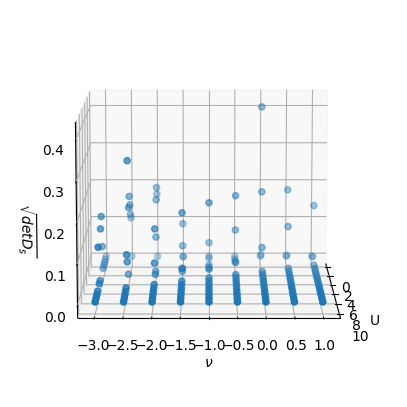

In [81]:
fig = plt.figure(figsize=(5,15))
ax = fig.add_subplot(projection='3d')

ax.scatter(U,np.real(mu), np.real(sdsfw), marker='o')

ax.set_xlabel('U')
ax.set_ylabel(r'$\nu$')
ax.set_zlabel(r'$\sqrt{det D_s}$')
ax.view_init(elev=10, azim=0, roll=0)

plt.show()

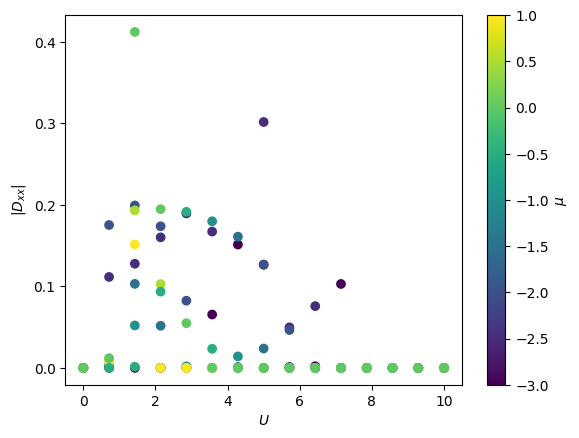

In [80]:
plt.xlabel(r'$U$')
plt.ylabel(r'$|D_{xx}|$')
#plt.ylim(0,0.4)
#plt.xlim(0,15)
plt.scatter(U[0:], np.abs(sfwxx[0:]), c=mu[0:])
plt.colorbar(label=r'$\mu$')

In [ ]:
U = np.array(sfwtab.U)
nu = np.array(sfwtab.nu, dtype=complex)
sdsfw = np.array(sfwtab.sq_det_SFW, dtype=complex)
sfwxx = np.array(sfwtab.SFWxx_new, dtype=complex)

array([-3. , -3. , -3. , -3. , -3. , -3. , -3. , -3. , -3. , -3. , -3. ,
       -3. , -3. , -3. , -3. , -2.5, -2.5, -2.5, -2.5, -2.5, -2.5, -2.5,
       -2.5, -2.5, -2.5, -2.5, -2.5, -2.5, -2.5, -2.5, -2. , -2. , -2. ,
       -2. , -2. , -2. , -2. , -2. , -2. , -2. , -2. , -2. , -2. , -2. ,
       -2. , -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5,
       -1.5, -1.5, -1.5, -1.5, -1.5, -1. , -1. , -1. , -1. , -1. , -1. ,
       -1. , -1. , -1. , -1. , -1. , -1. , -1. , -1. , -1. ,  0.5,  0.5,
        0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5,  0.5,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,
        1. ,  1. ,  1. ,  1. ,  1. ,  1. , -0.5, -0.5, -0.5, -0.5, -0.5,
       -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ])

In [84]:
sfwtab.mu.unique()

array([-3. , -2.5, -2. , -1.5, -1. ,  0.5,  1. , -0.5,  0. ])

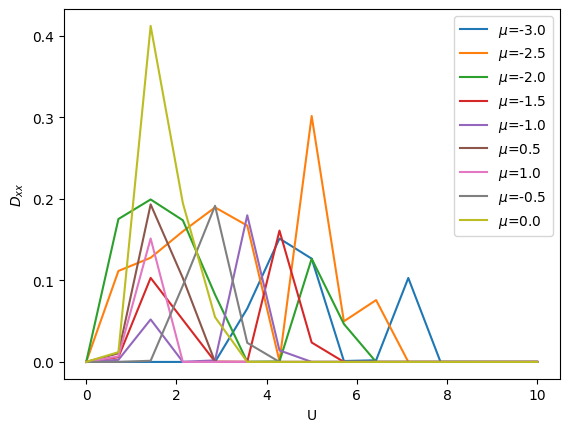

In [89]:
plt.xlabel('U')
plt.ylabel(r'$D_{xx}$')

ls = []
for i in sfwtab.mu.unique():
    U = np.array(sfwtab.U.loc[sfwtab.mu==i])
    nu = np.array(sfwtab.nu.loc[sfwtab.mu==i], dtype=complex)
    sdsfw = np.array(sfwtab.sq_det_SFW.loc[sfwtab.mu==i], dtype=complex)
    sfwxx = np.array(sfwtab.SFWxx_new.loc[sfwtab.mu==i], dtype=complex)
    plt.plot(U, np.abs(sfwxx), label=f'$\mu$={i}')
plt.legend()

In [27]:
n=3
d = list(literal_eval(sfwtab.delta.iloc[n][1:-1]))
ns = list(literal_eval(sfwtab.ns.iloc[n][1:-1]))
Uv = sfwtab.U.iloc[n]
mus = sfwtab.mu.iloc[n]
nus = literal_eval(sfwtab.nu.iloc[n][1:-1])


In [28]:
ham = hamiltonian.Model(N=2, kind='dDSL', delta=d, ns=ns, nu=nus, U=[Uv,Uv], mu=[mus, mus])

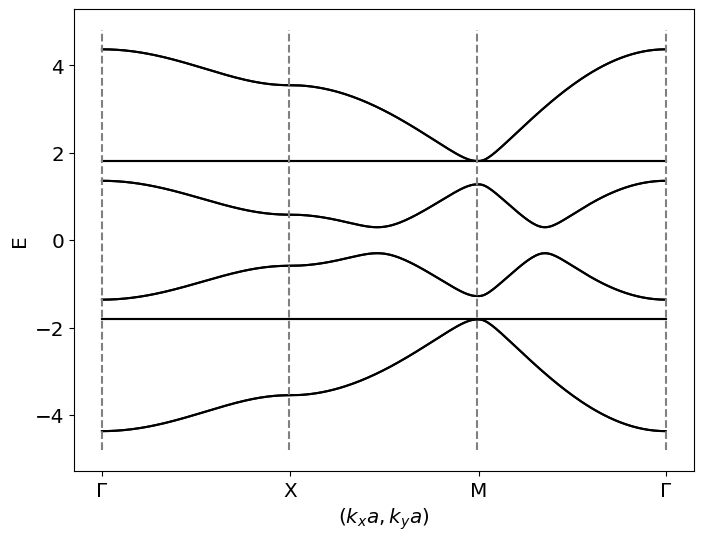

In [29]:
ham.plot_bands()

In [77]:
sfwxx[-1]/2

(-0.21438404460910782-2.945322543130314e-19j)

In [78]:
U = np.array(sfwtab2.U)
mu=np.array(sfwtab2.mu)
nu = np.array(sfwtab2.nu, dtype=complex)
deltas = np.array([*sfwtab2.delta], dtype=complex)
sdsfw = np.array(sfwtab2.sq_det_SFW, dtype=complex)

C:\Users\atsch\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\collections.py:193: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


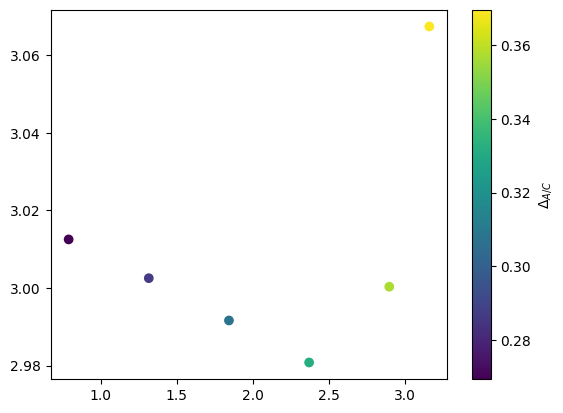

In [79]:
plt.scatter(U, nu,c=deltas[:,1])
plt.colorbar(label=r'$\Delta_{A/C}$')

In [80]:
def linfunc(x,m,n):
    return x*m+n

params, covp = fit(linfunc, U, mu)

In [81]:
covp

array([[ 6.04125887e-05, -1.24534715e-04],
       [-1.24534715e-04,  2.99134239e-04]])

In [82]:
Uarr = np.linspace(0,10,100)

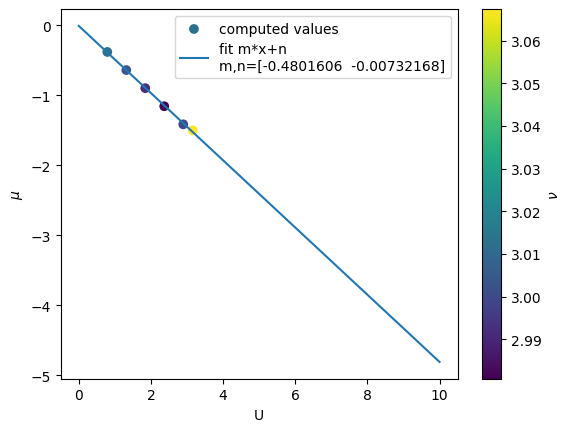

In [83]:
plt.xlabel('U')
plt.ylabel('$\mu$')


plt.scatter(U, mu,c=nu, label='computed values')
plt.plot(Uarr, linfunc(Uarr,*params), label=f'fit m*x+n\nm,n={params}')
plt.colorbar(label=r'$\nu$')
plt.legend()

In [84]:
sfwtab2.delta.iloc[:]

0    [(0.039231628800422746-1.4294820463225363e-20j...
1    [(0.07346148097379634+1.5995638795942288e-20j)...
2    [(0.11501086870790828-3.1556850834524705e-20j)...
3    [(0.16270137315548883-1.1123486447349069e-19j)...
4    [(0.21315378835497134-2.4663388890494768e-21j)...
5    [(0.23835008010253522+5.2642499423357043e-20j)...
Name: delta, dtype: object

In [85]:
np.array([*sfwtab2.delta])[:,1]

array([0.26928819+1.00843278e-18j, 0.28663527+1.26499677e-18j,
       0.30751637+3.33516198e-19j, 0.33143046+8.33129640e-19j,
       0.35684187-7.45607011e-19j, 0.36968755-5.67527824e-19j])

In [86]:
sfwtab2.nu.loc[np.array([*sfwtab2.delta])[:,1]>0.2]

0     (3.0125129674257893+6.234609998058662e-20j)
1     (3.002526394176937+1.2448983313124826e-19j)
2    (2.9916271552326927+1.3540663784257466e-19j)
3     (2.980798389253744+1.0116051489969854e-19j)
4      (3.000322313403875+3.183236749859206e-20j)
5        (3.067392620107659+5.6547616617445e-20j)
Name: nu, dtype: object

In [87]:
xarr = np.array(sfwtab2.U.loc[np.array(sfwtab2.nu, dtype=complex)>2])
yarr = np.array(sfwtab2.nu.loc[np.array(sfwtab2.nu, dtype=complex)>2], dtype=complex)
carr = np.array(sfwtab2.mu.loc[np.array(sfwtab2.nu, dtype=complex)>2], dtype=complex)

In [88]:
sfwtab2.mu.iloc[1]

-0.6379310344827586

C:\Users\atsch\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


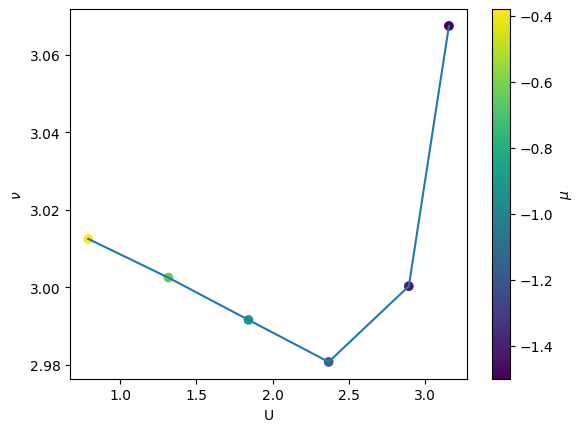

In [89]:
plt.xlabel('U')
plt.ylabel(r'$\nu$')
plt.scatter(U, nu, c=mu)
plt.plot(xarr, yarr)
plt.colorbar(label=r'$\mu$')

In [90]:
#U = np.array(sfwtab2.U.loc[np.array(sfwtab2.sq_det_SFW, dtype=complex) <= 2])
#nu = np.array(sfwtab2.nu.loc[np.array(sfwtab2.sq_det_SFW, dtype=complex) <= 2], dtype=complex)
#sdsfw = np.array(sfwtab2.sq_det_SFW.loc[np.array(sfwtab2.sq_det_SFW, dtype=complex) <= 2], dtype=complex)
#U = np.array(sfwtab2.U.loc[sfwtab2.U >= 1])
#nu = np.array(sfwtab2.nu.loc[sfwtab2.U >= 1], dtype=complex)
#sdsfw = np.array(sfwtab2.sq_det_SFW.loc[sfwtab2.U >= 1], dtype=complex)

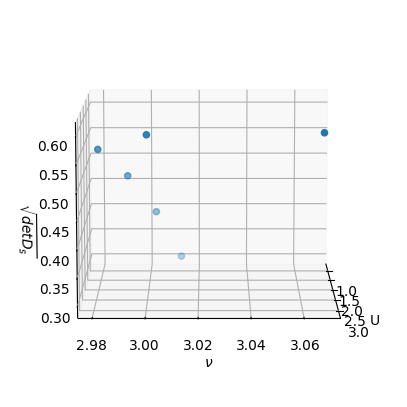

In [91]:
fig = plt.figure(figsize=(5,15))
ax = fig.add_subplot(projection='3d')

ax.scatter(U,np.real(nu), np.real(sdsfw), marker='o')

ax.set_xlabel('U')
ax.set_ylabel(r'$\nu$')
ax.set_zlabel(r'$\sqrt{det D_s}$')
ax.view_init(elev=10, azim=0, roll=0)

plt.show()

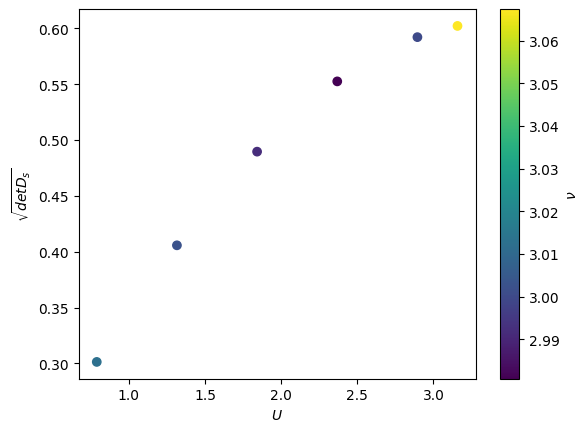

In [92]:
plt.xlabel(r'$U$')
plt.ylabel(r'$\sqrt{det D_s}$')
plt.scatter(U, sdsfw, c=nu)
plt.colorbar(label=r'$\nu$')

In [93]:
xarr = np.array(sfwtab2.mu.loc[sfwtab2.U==0.5])
yarr = np.array(sfwtab2.nu.loc[sfwtab2.U==0.5], dtype=complex)

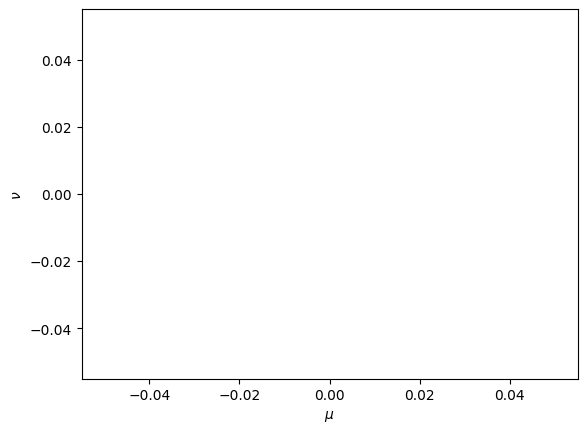

In [94]:
plt.xlabel(r'$\mu$')
plt.ylabel(r'$\nu$')
plt.scatter(xarr, yarr)

In [95]:
sfwtab_nu3

,U,mu,nu,sq_det_SFW,SFWxx,SFWxy,delta,ns,deltaError,nError,SFWxx_new
0,0.789474,-0.379310,(3.0125129674257893+6.234609998058662e-20j),(0.30132791061889413+8.496811714537978e-19j),[-0.31792947-8.54352371e-19j 0.10139348+1.594...,[ 0.10139348+1.59425798e-19j -0.31792947-8.579...,[(0.039231628800422746-1.4294820463225363e-20j...,"[(1.0071755337127803-1.1503340639881321e-21j),...",0.000131,0.010043,"[(-0.31792947-8.54352371e-19j), (0.10139348+1...."
1,1.315789,-0.637931,(3.002526394176937+1.2448983313124826e-19j),(0.40572315183623986+1.2167101303361298e-19j),[-0.42400223-2.09399052e-18j 0.12315281+4.646...,[ 0.12315281+4.64604229e-19j -0.42400223+1.591...,[(0.07346148097379634+1.5995638795942288e-20j)...,"[(1.0124688095971675-4.874791067294561e-21j), ...",0.000140,0.007867,"[(-0.42400223-2.09399052e-18j), (0.12315281+4...."
2,1.842105,-0.896552,(2.9916271552326927+1.3540663784257466e-19j),(0.48956645476016836+9.314418080599053e-19j),[-0.50586695-9.79663434e-19j 0.12738154+2.439...,[ 0.12738154+2.43939149e-19j -0.50586695-9.460...,[(0.11501086870790828-3.1556850834524705e-20j)...,"[(1.0214177295090296+1.1110812088917562e-20j),...",0.000164,0.006778,"[(-0.50586695-9.79663434e-19j), (0.12738154+2...."
3,2.368421,-1.155172,(2.980798389253744+1.0116051489969854e-19j),(0.5524702242960879+1.6423717029128016e-18j),[-0.56512313-2.46930914e-18j 0.11891512+5.978...,[ 0.11891512+5.9780321e-19j -0.56512313-9.9347...,[(0.16270137315548883-1.1123486447349069e-19j)...,"[(1.0350266192042512-1.685064724170448e-20j), ...",0.000190,0.005987,"[(-0.56512313-2.46930914e-18j), (0.11891512+5...."
4,2.894737,-1.413793,(3.000322313403875+3.183236749859206e-20j),(0.592078737784757+2.3432438167120857e-18j),[-0.60091627-1.59552211e-18j 0.10267977+4.142...,[ 0.10267977+4.14299330e-19j -0.60091627-3.163...,[(0.21315378835497134-2.4663388890494768e-21j)...,"[(1.0416171879996174-1.5001602993102552e-22j),...",0.000153,0.005364,"[(-0.60091627-1.59552211e-18j), (0.10267977+4...."
5,3.157895,-1.500000,(3.067392620107659+5.6547616617445e-20j),(0.6021168516153828+3.4181087730172883e-18j),[-0.60900182-2.46872540e-18j 0.09131549+6.135...,[ 0.09131549+6.13580789e-19j -0.60900182-4.474...,[(0.23835008010253522+5.2642499423357043e-20j)...,"[(1.0597695654688448+1.1890854959015373e-20j),...",0.000165,0.010134,"[(-0.60900182-2.4687254e-18j), (0.09131549+6.1..."
6,3.500000,-1.687884,(3.011093059235288-1.3273663844390345e-19j),(0.6044952102647275+3.929227502093128e-18j),[-0.60980572-3.61749577e-18j 0.08030292+3.929...,[ 0.08030292+3.92906274e-19j -0.60980572-4.276...,"[(0.266324660189894+1.2475794408244965e-19j), ...","[(1.0781590553505125-1.9504850495616525e-20j),...",0.000155,0.006960,"[(-0.60980572-3.61749577e-18j), (0.08030292+3...."
7,4.000000,-1.927964,(3.027275908945162-1.056275850134212e-19j),(0.5965898844346423+4.4112488965183235e-18j),[-0.60000563-4.66190313e-18j 0.06393173+7.697...,[ 0.06393173+7.69703519e-19j -0.60000563-4.274...,"[(0.30395148270120115-2.836854218094826e-19j),...","[(1.0920202441971705-2.717921412787676e-20j), ...",0.000172,0.006342,"[(-0.60000563-4.66190313e-18j), (0.06393173+7...."
8,4.500000,-2.218044,(2.9277761895297885+1.2281393083721393e-19j),(0.5723521152308779+3.6632652960814816e-18j),[-0.57461494-3.38212331e-18j 0.05094493-1.088...,[ 0.05094493-1.08898603e-19j -0.57461494-3.896...,"[(0.3335997047777735+2.874460536841101e-20j), ...","[(1.1140047341726862+5.675936729167965e-20j), ...",0.000176,0.002598,"[(-0.57461494-3.38212331e-18j), (0.05094493-1...."
9,4.500000,-2.168044,(3.052840280713009-3.812379329849967e-21j),(0.578245700748034+3.790936708254203e-18j),[-0.58043547-4.63751707e-18j 0.0503711 -1.262...,[ 0.0503711 -1.26221445e-19j -0.58043547-2.893...,"[(0.3350447285992281-2.7878444086737473e-19j),...","[(1.1023013489347608-2.4279896398953918e-20j),...",0.000168,0.005861,"[(-0.58043547-4.63751707e-18j), (0.0503711+0j)]"


In [96]:
U = np.array(sfwtab_nu3.U)
mu=np.array(sfwtab_nu3.mu)
nu = np.array(sfwtab_nu3.nu, dtype=complex)
sdsfw = np.array(sfwtab_nu3.sq_det_SFW, dtype=complex)
sfwxx = np.array(list(sfwtab_nu3.SFWxx_new))[:,0]
sfwxy = np.array(list(sfwtab_nu3.SFWxx_new))[:,1]

In [97]:
sfwxx

array([-0.31792947-8.54352371e-19j, -0.42400223-2.09399052e-18j,
       -0.50586695-9.79663434e-19j, -0.56512313-2.46930914e-18j,
       -0.60091627-1.59552211e-18j, -0.60900182-2.46872540e-18j,
       -0.60980572-3.61749577e-18j, -0.60000563-4.66190313e-18j,
       -0.57461494-3.38212331e-18j, -0.58043547-4.63751707e-18j,
       -0.55179428-4.58423539e-18j, -0.55549531-4.46324885e-18j,
       -0.52650704-4.03952088e-18j, -0.52834913-4.16294594e-18j,
       -0.50031328-2.67898476e-18j, -0.50129475-3.46935792e-18j,
       -0.47493681-4.00686859e-18j, -0.44704915-2.65232951e-18j,
       -0.45075953-2.57683370e-18j, -0.44704915-2.65232951e-18j,
       -0.45075953-2.57683370e-18j, -0.45024449-3.23108815e-18j,
       -0.38735759-2.81274048e-18j, -0.38720481-3.55806514e-18j,
       -0.33787995-2.58428123e-18j])

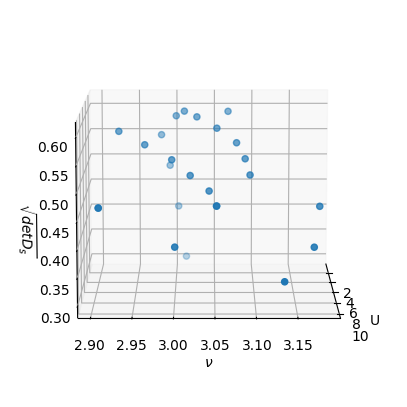

In [98]:
fig = plt.figure(figsize=(5,15))
ax = fig.add_subplot(projection='3d')

ax.scatter(U,np.real(nu), np.real(sdsfw), marker='o')

ax.set_xlabel('U')
ax.set_ylabel(r'$\nu$')
ax.set_zlabel(r'$\sqrt{det D_s}$')
ax.view_init(elev=10, azim=0, roll=0)

plt.show()

C:\Users\atsch\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\collections.py:193: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)
C:\Users\atsch\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


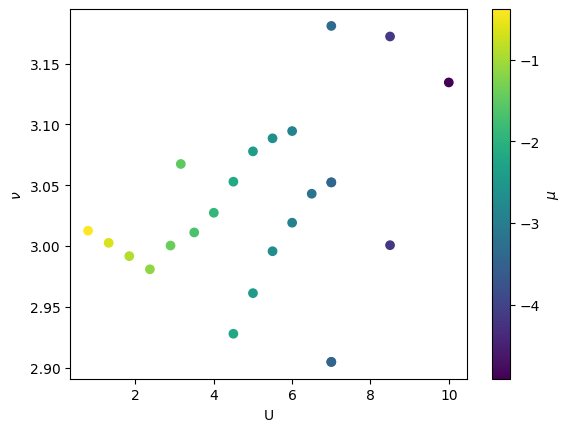

In [99]:
plt.xlabel('U')
plt.ylabel(r'$\nu$')
plt.scatter(U, nu, c=mu)
plt.plot(xarr, yarr)
plt.colorbar(label=r'$\mu$')

C:\Users\atsch\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\axes\_axes.py:4347: ComplexWarning: Casting complex values to real discards the imaginary part
  c = np.asanyarray(c, dtype=float)


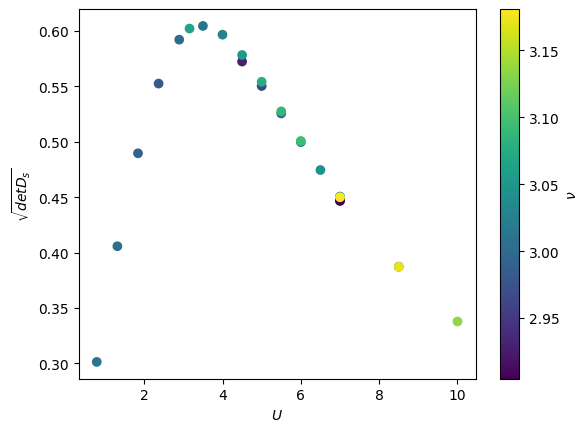

In [100]:
plt.xlabel(r'$U$')
plt.ylabel(r'$\sqrt{det D_s}$')
plt.scatter(U, sdsfw, c=nu)
plt.colorbar(label=r'$\nu$')

In [101]:
sfwxx

array([-0.31792947-8.54352371e-19j, -0.42400223-2.09399052e-18j,
       -0.50586695-9.79663434e-19j, -0.56512313-2.46930914e-18j,
       -0.60091627-1.59552211e-18j, -0.60900182-2.46872540e-18j,
       -0.60980572-3.61749577e-18j, -0.60000563-4.66190313e-18j,
       -0.57461494-3.38212331e-18j, -0.58043547-4.63751707e-18j,
       -0.55179428-4.58423539e-18j, -0.55549531-4.46324885e-18j,
       -0.52650704-4.03952088e-18j, -0.52834913-4.16294594e-18j,
       -0.50031328-2.67898476e-18j, -0.50129475-3.46935792e-18j,
       -0.47493681-4.00686859e-18j, -0.44704915-2.65232951e-18j,
       -0.45075953-2.57683370e-18j, -0.44704915-2.65232951e-18j,
       -0.45075953-2.57683370e-18j, -0.45024449-3.23108815e-18j,
       -0.38735759-2.81274048e-18j, -0.38720481-3.55806514e-18j,
       -0.33787995-2.58428123e-18j])

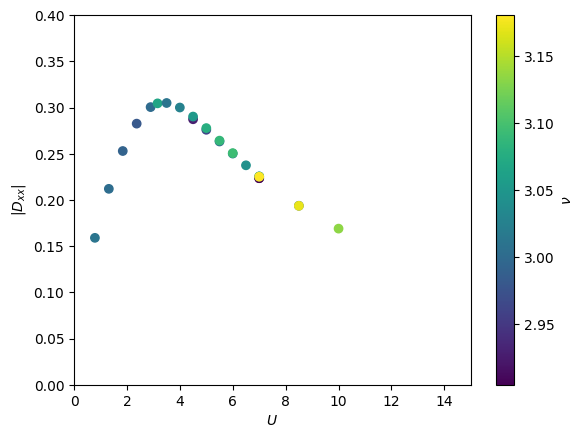

In [102]:
plt.xlabel(r'$U$')
plt.ylabel(r'$|D_{xx}|$')
plt.xlim(0,15)
plt.ylim(0,0.4)
plt.scatter(U, np.sqrt(sfwxx**2)/2, c=nu)
#plt.scatter(U, np.sqrt(sfwxy**2), c=nu)

plt.colorbar(label=r'$\nu$')